# Part I - Ford GoBike System Data Exploration

##### by Vu Le


## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area on February 2019. Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.


In the process below, version of tools used would be as follows:
- python 3.8
- seaborn 0.12.1



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#check the data quality
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#Check the number of null value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#Check the duplication of the dataset
df.duplicated().sum()

0

In [6]:
#Initial check the range of data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# check the value of member_gender column
df['member_gender'].unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

#### Data Quality issues and Enrichment

##### Data Quality

1. Some columns are not in the right data type
    - start_time and end_time columns are in string time instead of timestamp type
    - start_station_id and end_station_id should be in string type
    - bike_id should be in string type
    - user_type should be in category type
    - member_birth_year should be in datetime type
2. Some columns would not be used for the analysis and should be dropped off

*For the null value in start_station_id, member_birth_year and member_gender, it is decided to not remove them from the dataset. They would be leveraged to generate other seperated aspects.*

##### Enrichment

1. Because the dataset has complete datetime column (i.e. start_time, end_time) in the form where we could leverage to extract more information as follows:
    - time of a day
    - day of a week
    - day of a month


2. Enrich the age of member column to replace the member_year due to the missing data issue

3. Calculate the trip duration in minutes instead of seconds

### Cleaning data

In [8]:
# change the data type of some columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('str').apply(lambda x: x.replace('.0',''))
df['end_station_id'] = df['end_station_id'].astype('str').apply(lambda x: x.replace('.0',''))
df['bike_id'] = df['bike_id'].astype('str')
df['user_type'] = df['user_type'].astype('category')

In [9]:
#Drop off the columns which would not be in use
df = df.drop(['start_station_latitude','start_station_longitude', \
              'end_station_latitude','end_station_longitude','bike_share_for_all_trip'], axis = 1)

In [10]:
# Check the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male


In [11]:
#Check the info of each column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        183412 non-null  int64         
 1   start_time          183412 non-null  datetime64[ns]
 2   end_time            183412 non-null  datetime64[ns]
 3   start_station_id    183412 non-null  object        
 4   start_station_name  183215 non-null  object        
 5   end_station_id      183412 non-null  object        
 6   end_station_name    183215 non-null  object        
 7   bike_id             183412 non-null  object        
 8   user_type           183412 non-null  category      
 9   member_birth_year   175147 non-null  float64       
 10  member_gender       175147 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 14.2+ MB


### Enriching features

In [12]:
#enrich the features containing date and time information

#time of day
df['time_of_day'] = df['start_time'].dt.hour

#day of week
df['day_of_week'] = df['start_time'].dt.day_name()

#day of month
df['day_of_month'] = df['start_time'].dt.day

In [13]:
#enrich the feature containing the age of member
df['member_age'] = 2022 - df['member_birth_year']
df['member_age'].fillna(0, inplace = True)
df['member_age'] = df['member_age'].astype('int')

In [14]:
#create "duration_min" column to show the duration of trip in minute
df['duration_min'] = (df.duration_sec/60)

In [15]:
#check the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,time_of_day,day_of_week,day_of_month,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,17,Thursday,28,38,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,NaN,NaN,18,Thursday,28,0,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,12,Thursday,28,50,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,17,Thursday,28,33,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,23,Thursday,28,48,26.416667


In [16]:
#Save the df_master to the csv file called '201902-fordgobike-tripdata-cleaned.csv' for the ease of use for the Part II_explanation
df.to_csv('201902-fordgobike-tripdata-cleaned.csv', index = False)

In [111]:
#create a function to make a countplot
def makeCountplot(data, xVar, hueVar = None, palette = None, color = None, order = None, figsize = [20,7], labelsize = 15, title = ''):
    
    #turn off plt.figure() when there are subplots
    if figsize:
        plt.figure(figsize = figsize)
    
    #make the countplot
    sns.countplot(data = data,
                  x= xVar, 
                  hue = hueVar, 
                  color = color, 
                  order = order, 
                  palette = palette)
    
    #Clean up value of variable
    xVar = xVar.replace('_', ' ')
    
    if hueVar:
        hueVar = hueVar.replace('_',' ')
        
    #Add information of a plot
    plt.xlabel(xVar.title(), size = labelsize)
    plt.ylabel('Frequency',size = labelsize)


    plt.title(f"""Distribution of {xVar}{' by ' if hueVar else ''}{hueVar if hueVar else ''}{title}""".title(), 
                  fontsize = 20, weight = 'bold')
    sns.despine()

In [128]:
#create a function to make a lineplot
def makeLineplot(data, figsize = [25,7], color = None,user = None, xticks = [1000,10000,2000], yticks = [1,32,1], ylim = None):
    #turn off the figsize when there are subplots
    if figsize:
        plt.figure(figsize = figsize)
        
    #create a lineplot
    if user:
        sns.lineplot(data = data[user], dashes = False, color = color)
    else:
        sns.lineplot(data = data, dashes = False, color = color)
        
    #xticks
    if xticks:
        x1, x2, x3 = xticks
        plt.xticks(np.arange(x1,x2,x3))
    
    #yticks
    if yticks:
        y1, y2, y3 = yticks
        plt.yticks(np.arange(y1,y2,y3))
    
    #set limit to y axis
    if ylim:
        ylim1, ylim2 = ylim
        plt.ylim(ylim1, ylim2)
    
    #add information of the plot
    plt.xlabel('Day of month', size = 20)
    plt.ylabel('Frequency', size = 20)
    
    #add title of the plot
    plt.title(f'''Number of trip by day of month{': ' if user else ''}{user if user else ''}''', size = 30, weight = 'bold')

### What is the structure of the dataset?

Our dataset contains 183.412 rows with 13 columns recording the information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for February 2019. Among the columns in the dataset, there are 1 category type, 2 datetime type, 1 float type, 1 integer and 4 object type columns.

### What is/are the main feature(s) of interest in the dataset?

The analysis hereinafter would focus in the behaviours of the users (i.e.trip duration, gender of member, is the member the customer or subcriber, etc.) under the aspect of time.

### What features in the dataset will help support the investigation into feature(s) of interest?

The time dimensions, the duration of trip, the types of user, the age of member, etc. would all be useful to support the generation of customer's insight.

## Univariate Exploration

In [17]:
## Univariate Exploration# Make a copy of the dataset
master_df = df.copy()

In [77]:
#The most 10 common start_station and end_station
top_start = master_df.start_station_name.value_counts().sort_values(ascending = False).head(10)
start_station = master_df[master_df['start_station_name'].isin(top_start.index)].start_station_name


top_end = master_df.end_station_name.value_counts().sort_values(ascending = False).head(10)
end_station = master_df[master_df['end_station_name'].isin(top_end.index)].end_station_name

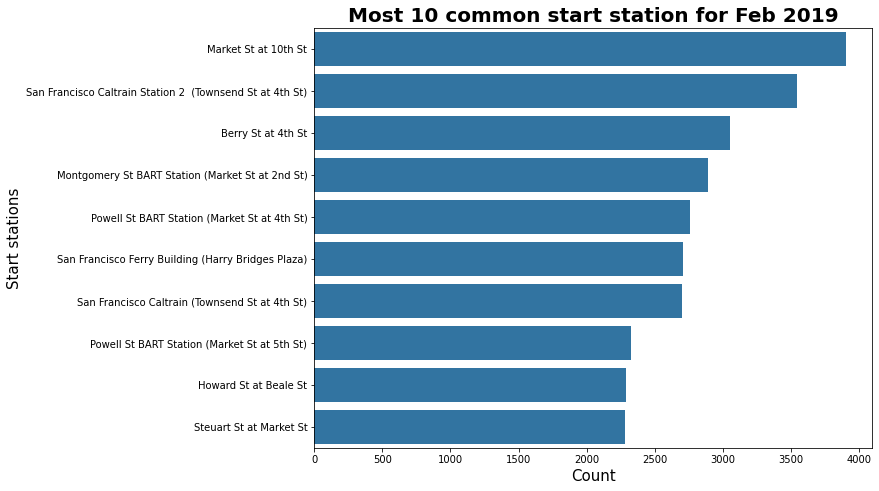

In [76]:
#Visualize the top common start_station and end_station
base_color = sns.color_palette()[0]
plt.figure(figsize = [10,17])
#start station
plt.subplot(2,1,1)
sns.countplot( y = start_station, color = base_color, order = top_start.index)

plt.xlabel('Count', size = 15)
plt.ylabel('Start stations', size = 15)
plt.title('Most 10 common start station for Feb 2019', weight = 'bold', size = 20)


plt.show();

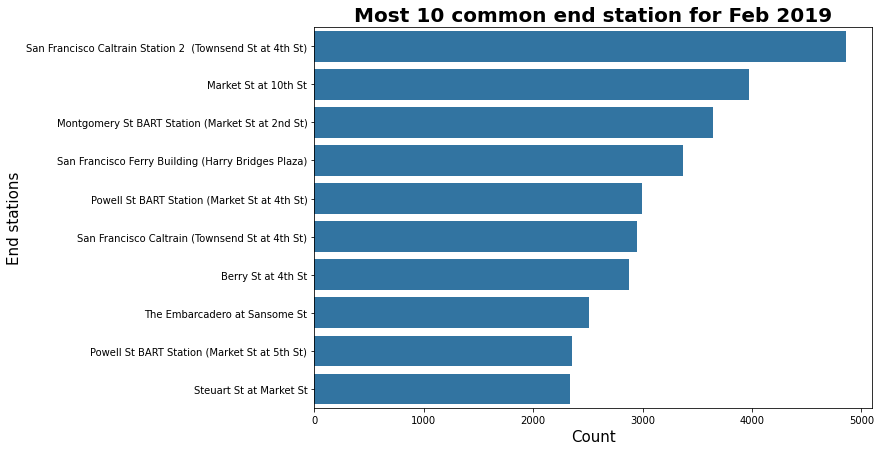

In [20]:
#end station
plt.figure(figsize = [10,7])
sns.countplot( y = end_station, color = base_color, order = top_end.index)

plt.xlabel('Count', size = 15)
plt.ylabel('End stations', size = 15)
plt.title('Most 10 common end station for Feb 2019', weight = 'bold', size = 20)

plt.show();

In [21]:
#Check how many stations are in the top list as start station and end station
top_station = start_station.value_counts().reset_index()
top_station = top_station[top_station['index'].isin(top_end.index)]['index'].count()
top_station

9

**Observation**

As we illustarted above, 9 over 10 most common start station are also the most common end stations. In which, Market St at 10th St and San Francisco Caltrain Station 2 are the two stations recorded as most two common start and end stations with a signifincant higher in the number of visit compared to other stations.

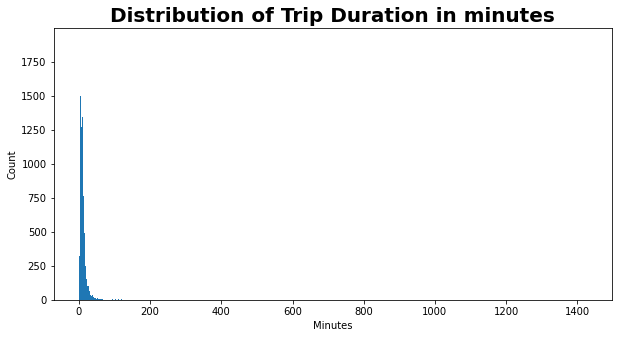

In [22]:
# illustrate the distribution of the trip duration
plt.figure(figsize = [10,5])
bins = np.arange(0, master_df['duration_min'].max() + 1, 0.1)
plt.hist(data = master_df, x = 'duration_min', bins = bins)

plt.xlabel('Minutes')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration in minutes', size = 20, weight = 'bold')

plt.show();

In [23]:
#check the maximum value of duration minute
master_df.duration_min.value_counts().sort_index(ascending = False).head(20)

1424.066667    1
1409.133333    1
1396.200000    1
1391.983333    1
1390.116667    1
1386.583333    1
1375.200000    1
1373.083333    1
1359.150000    1
1348.183333    1
1325.800000    1
1254.366667    1
1240.133333    1
1234.950000    1
1232.166667    1
1213.733333    1
1210.450000    1
1209.833333    1
1209.600000    1
1206.016667    1
Name: duration_min, dtype: int64

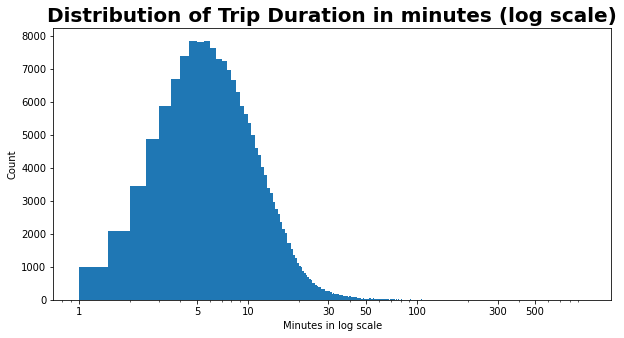

In [24]:
#Histogram chart of trip duration in minutes in log scale
plt.figure(figsize = [10,5])
bins = np.arange(1, 1000, 0.5)
plt.hist(data = master_df, 
         x = 'duration_min', 
         bins = bins)

# Generate the x-ticks you want to apply
ticks = [1, 5, 10, 30, 50, 100, 300, 500]
# Convert ticks into string values, to be displayed the x-axis
labels = ['{}'.format(tick) for tick in ticks]

plt.xlabel('Minutes in log scale')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration in minutes (log scale)', size = 20, weight = 'bold')

#apply the x log scale
plt.xscale('log')


#apply x tick
plt.xticks(ticks, labels)
plt.show();

**Observation**

As illustrated, there are some notable findings as follows:
- The trip lengths vary in a relatively substantial range from 1 minute to over 14,000 minutes (24 hours equivalent)
- It is skewed to the right with most of the trips take 3 to 50 minutes, where 5 minutes is the most common duration of a trip, and only a minority take more than 100 minutes for a ride.

In [25]:
#Check the value of member_age column
master_df['member_age'].value_counts().sort_index()

0      8265
21       34
22     1678
23     2528
24     3208
       ... 
112       1
120      11
121       6
122      53
144       1
Name: member_age, Length: 76, dtype: int64

In [26]:
#Identify the amount of members having age more than 100
master_df.query('member_age >= 90').member_age.count()

167

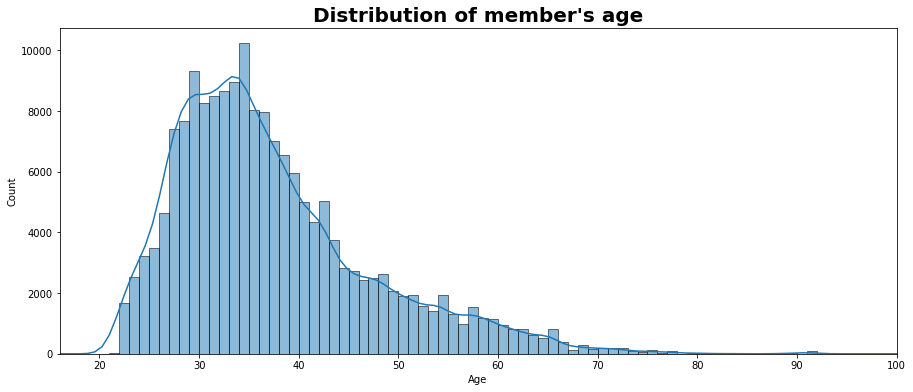

In [27]:
# illustrate the distribution of the age of member
plt.figure(figsize = [15,6])
bins = np.arange(0, master_df['member_age'].max() + 1, 1)
sns.histplot(data = master_df, 
             x = 'member_age', 
             bins = bins, 
             kde = True,
             color = base_color)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of member's age", size = 20, weight = 'bold')

plt.xlim(16,100)

plt.show();

**Observation**

The members attending the bike-sharing are quite young where their age are mostly between 25 to around 40, in which 32-35 years-old member takes a majority part.

In [28]:
#Count of member gender
member_gender = master_df['member_gender'].value_counts()

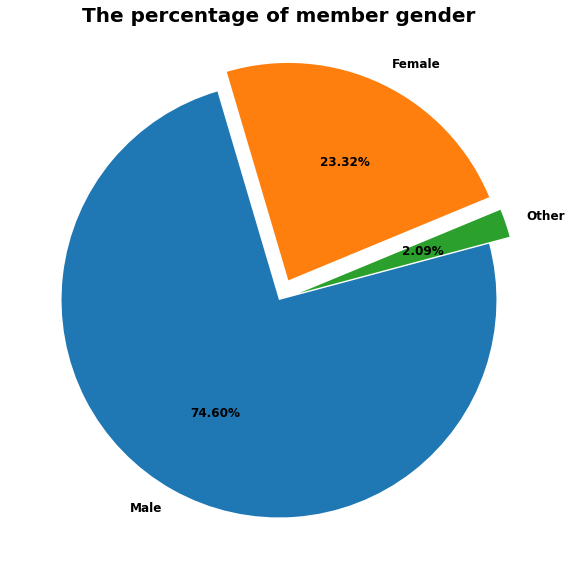

In [29]:
# Pie chart to illustrate the proportion of among user type
plt.figure(figsize = [10,10])

plt.pie(member_gender, 
        labels = member_gender.index, 
        startangle = 15, 
        counterclock = False,
        autopct = '%1.2f%%',
        explode = [0, 0.1,0.1],
        textprops={'fontsize': 12, 'weight':'bold', 'color':'black'}
       )

plt.title('The percentage of member gender', size = 20, weight = 'bold')

plt.show();

**Observation**
- The majority of members are men with more than 74% over total member.
- Women and other gender accounts for 23.32% and 2.09% respectively, which is 26% in total

In [30]:
#Count of user type
user_type = master_df['user_type'].value_counts()

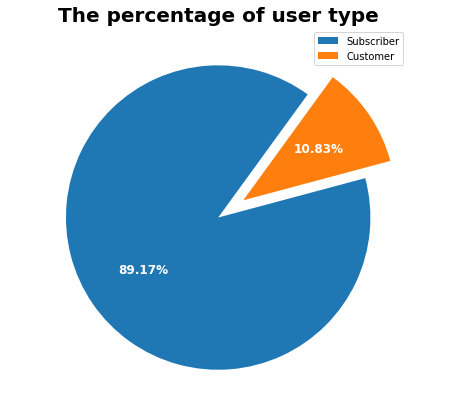

In [31]:
# Pie chart to illustrate the proportion of among user type
plt.figure(figsize = [7,7])

plt.pie(user_type, 
        labels = user_type.index, 
        startangle = 15, 
        counterclock = False,
        autopct = '%1.2f%%',
        explode = [0, 0.2],
        textprops={'fontsize': 12, 'weight':'bold', 'color':'w'}
       )

plt.title('The percentage of user type', size = 20, weight = 'bold')
plt.legend()

plt.show();

**Observation**

There is a great difference in number between Customer and Subscriber attending GoBike system where nearly 90% percent of attendants are subscriber, and Customer only accounts for 10.8%.

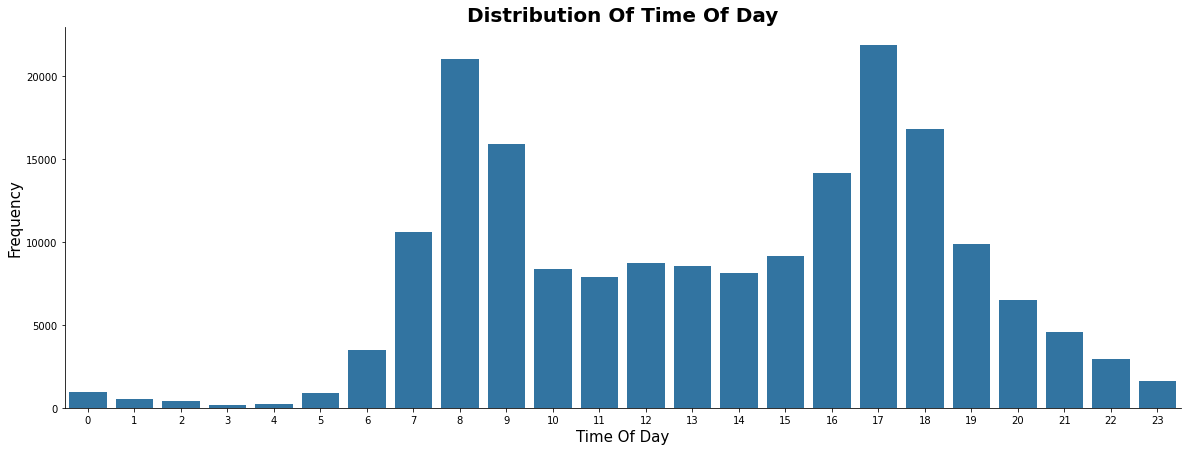

In [107]:
#create a value count series for time of day
makeCountplot(data = master_df, xVar = 'time_of_day', color = base_color,)

plt.show();

**Observation**

The plot shows that there are two outstanding peak time, one is at 8am and the other is at 5pm. In detail, at 8am, the demand of member rapidly spike up to more than 20.000 trips and go down till 10am. Such demand then remains stable at around 8.000 trip until it reach the next peak at 5pm before gradually decrease to the lowest point at 3am.

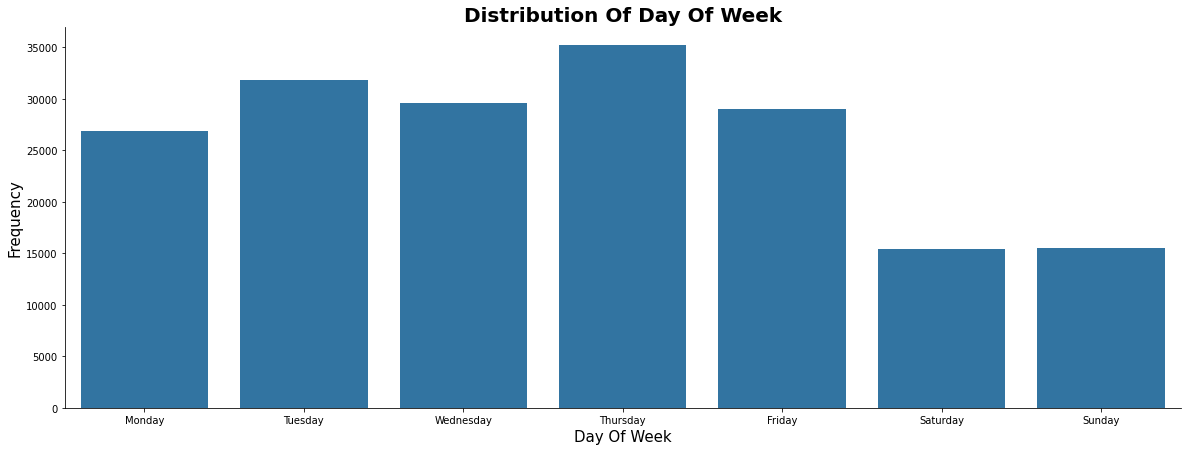

In [108]:
#order of weekday

weekday =["Monday","Tuesday",'Wednesday','Thursday','Friday','Saturday','Sunday']

#create a value count series for day of week

makeCountplot(data = master_df, 
              xVar = 'day_of_week', 
              color = base_color,
              order = weekday)

plt.show();

**Observation**

Coming to the number of trip by day of week, it seems that the weekdays from Monday to Friday are ideal for riding bike. Accordingly, comparing to two days of weekend (i.e. Saturday and Sunday), the number of trips in other days are significantly higher, especially on Thursday where the number of trips on that day are might be two times higher than the weekend.

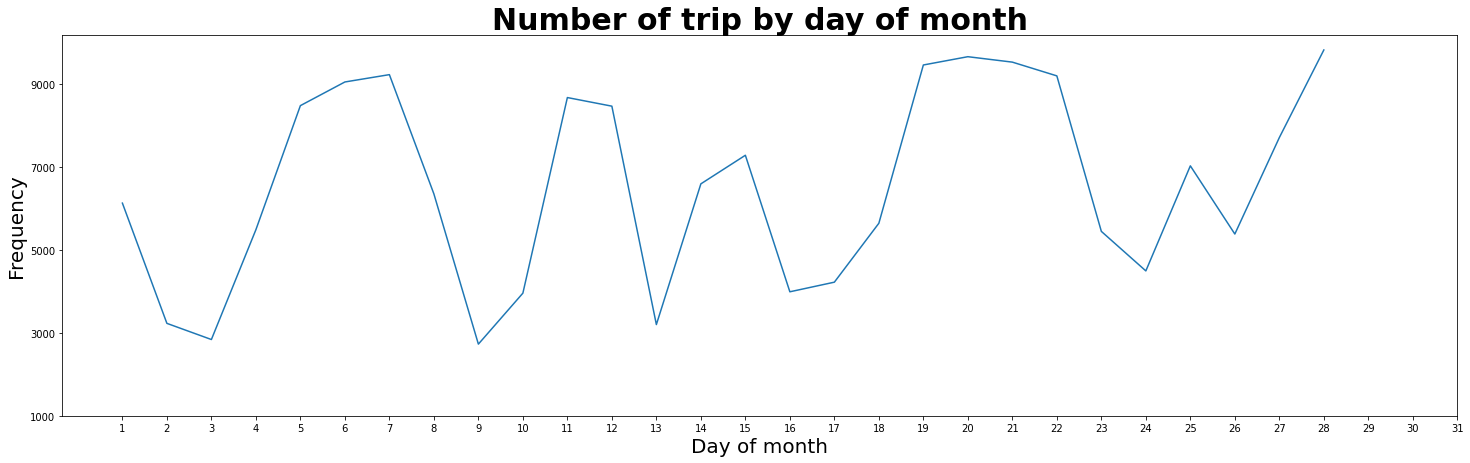

In [122]:
#create a df record the value count of value under day_of_month column
day_of_month = master_df['day_of_month'].value_counts()

#visualize the lineplot
makeLineplot(data = day_of_month, color = base_color, xticks = [1,32,1], yticks = [1000,10000,2000])

**Observation**

Following the observation of number of trips by weekday, when it comes to consider the number of trip by day of month, the plot shows a very same picture with the number of trips by day of week plot above. With a period of 5 day peak and then drop dramatically at the day of sixth, it shows a strong fluctuation in number of trips between weekdays and weekend.

However, following the pattern above, it could be considered that there was an abnormal drop where the number went below 4.000 trips on 13th February 2019 and, although, afterward reached peak on 15th February, it was still very low when comparing to other peak days.


### Discuss the distribution(s) of the variable(s) of interest.

- 9 over 10 most common start station are also the most common end stations. In which, Market St at 10th St and San Francisco Caltrain Station 2 are the two stations recorded as most two common start and end stations.
- The trip lengths vary in a very wide range from 1 minute to over 14,000 minutes (24 hours equivalent).
- It is skewed to the right with most of the trips take 3 to 50 minutes and 5 minutes is the most common duration of a trip.
- 74.6% of members are male, female and other genders accounts for 23.3% and 2.1% respectively
- Nearly 90% of members are Subscriber
- Within a day, there are two periods of time where the demand of bike reach the peak, one is on 8AM and the other is on 5PM.
- The number of trips conducted on weekdays are significantly higher, especially on Thurday, comparing to the weekend days (i.e. Saturday and Sunday)

### Data wrangling issues and solutions

- The member_age column is found with abnormal value where there are 167 members having age more than 90. Therefore, it is decided to only remove them upon each specific visualization but not completely eliminate from the data because, the other parts of the dataset could still be used for insight generation. 
- member_gender and member_birth_year also have NaN value, however, instead of being completely removed from the dataset, they would be considered separately for each visualization.
- There are a very small amount of more-than-1400-minutes trips over the total amount recorded, hence, for the ease of the interpretation of the data, the value of duration_min column would be selected in order to fit the requirements of particular plots.

## Bivariate Exploration

(0.0, 20000.0)

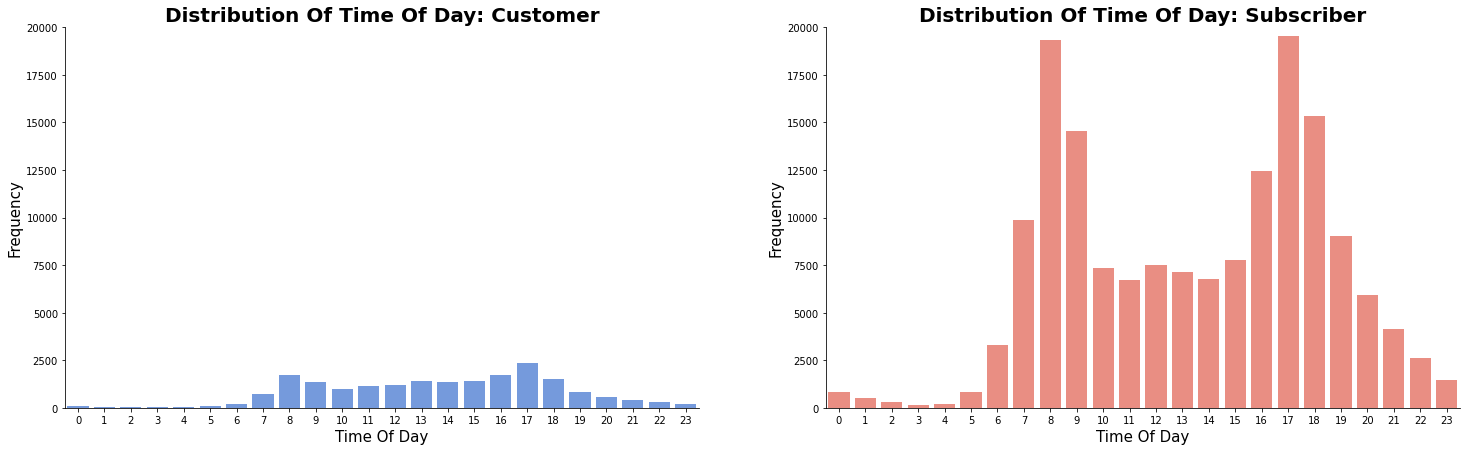

In [153]:
plt.figure(figsize = [25,7])

#Customer
plt.subplot(1,2,1)
makeCountplot(data = master_df.query('user_type == "Customer"'), xVar = 'time_of_day', color = 'cornflowerblue', figsize =None, labelsize = 15, title = ": Customer")

plt.ylim(0,20000)

#Subscriber
plt.subplot(1,2,2)
makeCountplot(data = master_df.query('user_type == "Subscriber"'), xVar = 'time_of_day', color = 'salmon', figsize =None, labelsize = 15,title = ': Subscriber') 

plt.ylim(0,20000)

**Observation**

Because the Customer user only accounts for 11%, correspondingly, the number of trips conducted of Customer user are also significantly lower than the Subscriber user. However, both users have a very same pattern in the number of trips by time of day, where they reach the peak at 8AM and 5PM, remain stable from 10AM to 3PM and go down from 7PM to the lowest point at 3AM.

<Figure size 1440x504 with 0 Axes>

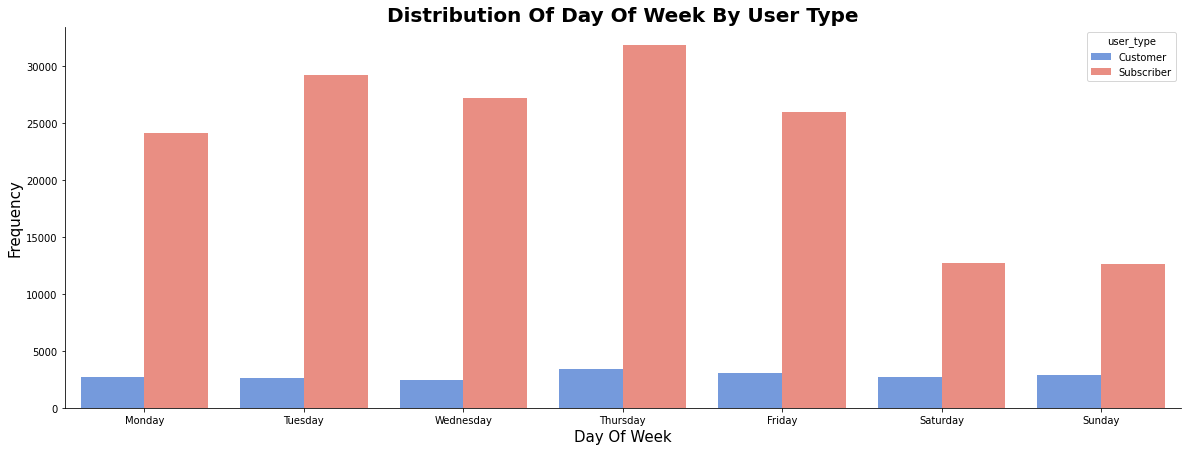

In [112]:
plt.figure(figsize = [20,7])

weekday =["Monday","Tuesday",'Wednesday','Thursday','Friday','Saturday','Sunday']

#create a value count series for day of week

makeCountplot(data = master_df, xVar = 'day_of_week', palette = ['cornflowerblue','salmon'], order = weekday, hueVar = 'user_type')


plt.show();

**Observation**

It could be seen that the number of trips by day of week for both user type have the same pattern with the general number of trips by day of week above, high demand on weekdays and less demand on weekend.

However, for the Customer user, the records show that there is not a very significant different in the number of trips between weekend and weekdays.

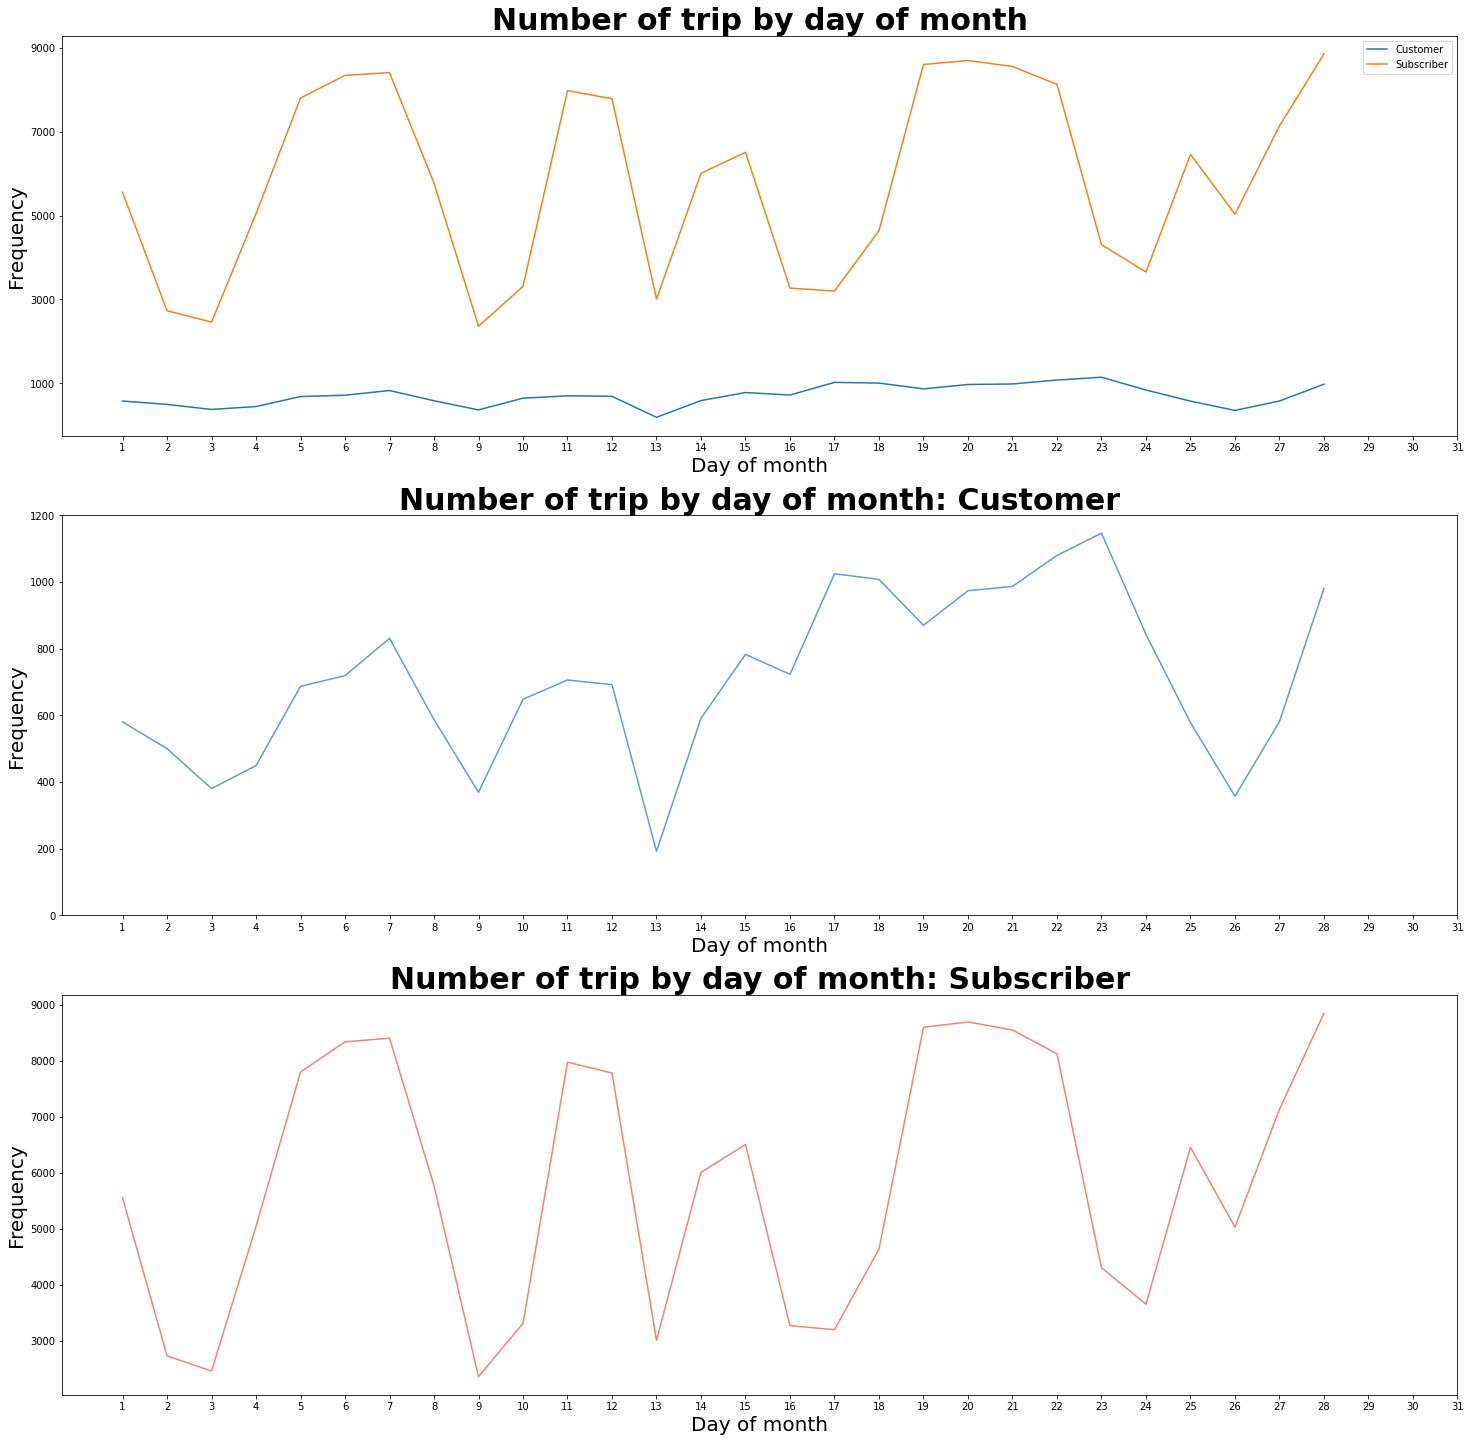

In [154]:
plt.figure(figsize = [25,25])

day_of_month = master_df[['day_of_month','user_type']].value_counts().reset_index( name = 'count')
day_of_month = day_of_month.pivot(index = 'day_of_month', columns = 'user_type', values = 'count')
                                  
#General plot        
plt.subplot(3,1,1)

makeLineplot(data = day_of_month, figsize = None, color = ['cornflowerblue','salmon'] , xticks = [1,32,1], yticks = [1000,10000,2000])
plt.legend()

#Customer
plt.subplot(3,1,2)

makeLineplot(data = day_of_month, figsize = None, color ='cornflowerblue', xticks = [1,32,1], yticks = None, ylim = [0,1200], user = 'Customer')

#Subscriber
plt.subplot(3,1,3)

makeLineplot(data = day_of_month, figsize = None, color ='salmon', xticks = [1,32,1], yticks = None, user = 'Subscriber')



**Observation**

As mentioned above, the demand of Customer user does not vary significantly by the day of week, and this is clearer under the aspect of day of month. 

Accordingly, the fluctuation is still there but not as sharp as the demand of Subscriber. 

Beside, instead of following the same pattern of the overall plot like the Subscriber user does, it could be seen that the number of trips for such user type does not follow the period of 5 day up and drop down at sixth, moreover, the demand have nailed at high points for a long period.

But there is a similar between two user types where the demand dropped notably on 13th of the month.


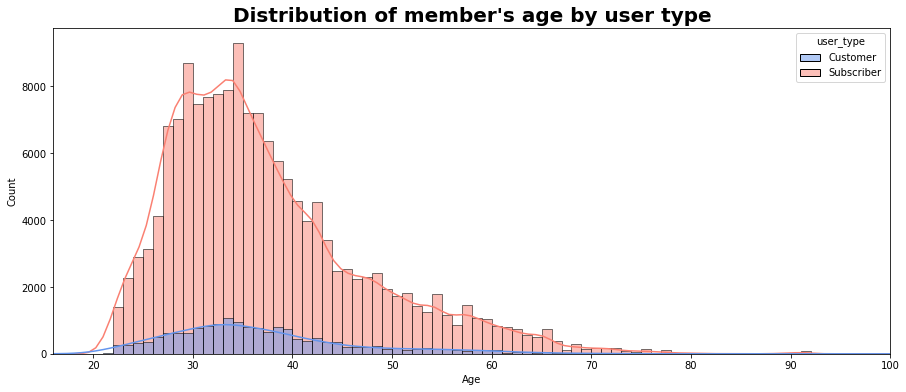

In [38]:
# illustrate the distribution of the age of member
plt.figure(figsize = [15,6])
bins = np.arange(0, master_df['member_age'].max() + 1, 1)
sns.histplot(data = master_df, 
             x = 'member_age', 
             bins = bins, 
             kde = True,
             color = base_color,
             hue = 'user_type',
             palette = ['cornflowerblue','salmon'])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of member's age by user type", size = 20, weight = 'bold')

plt.xlim(16,100)

plt.show();

**Observation**

Both Customer user and Subscriber user have the same user segment where the people within the age from 25 to around 40 have the highest demand in bike.

Most users under both types are at the age between 32 to 35 years old.

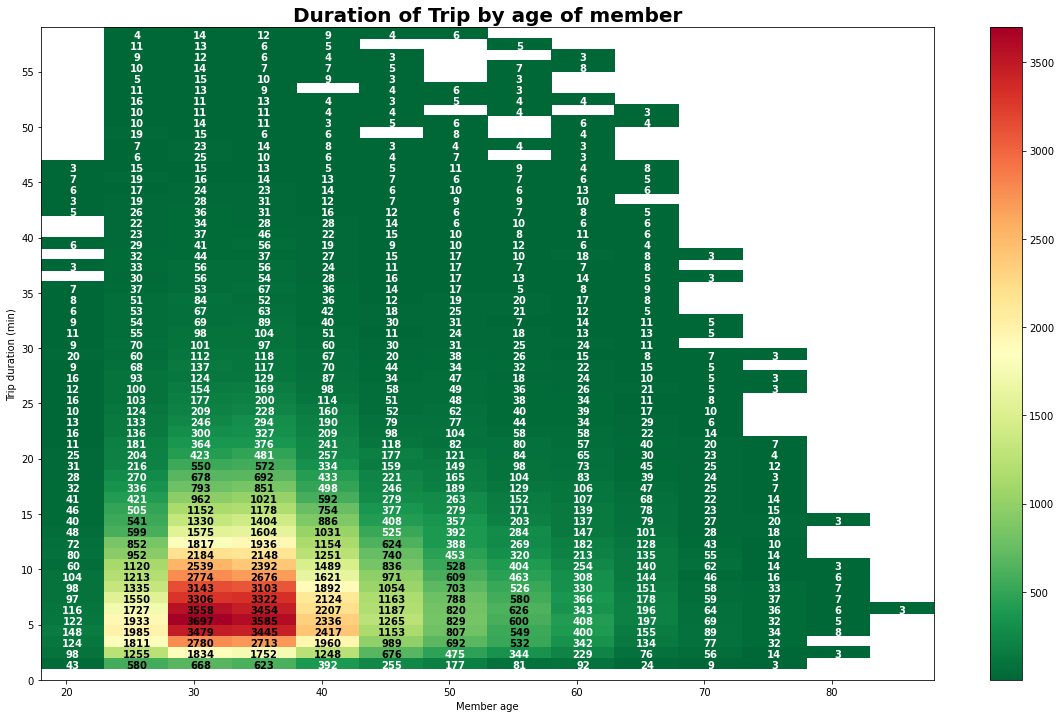

In [155]:
#duration vs age
eligible_age = master_df.query('18 < member_age < 90')

x_interval = 5 #5 years
y_interval = 1 #1 minutes
plt.figure(figsize = [20,12])
bins_x = np.arange(18, 90, x_interval)
bins_y = np.arange(0, 60, y_interval)

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = eligible_age, x = 'member_age', y = 'duration_min', cmin=3, cmap='RdYlGn_r',
                 bins = [bins_x,bins_y])

y_ticks = [i for i in range(0,60,5)]
ytck_label = ['{}'.format(i) for i in y_ticks]

plt.colorbar()
plt.xlabel('Member age', size = 10)
plt.ylabel('Trip duration (min)', size = 10)
plt.title('Duration of Trip by age of member', size = 20, weight = 'bold')
plt.yticks(y_ticks, ytck_label);

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# # Add text annotation on each cell
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= np.nanquantile(counts,.85): # increase visibility on darker cells
            plt.text(bins_x[i]+ x_interval/2, bins_y[j]+.3, int(c),
                     ha = 'center', va = 'center', color = 'black', weight = 'bold')
        elif c > 0:
            plt.text(bins_x[i]+x_interval/2, bins_y[j]+.3, int(c),
                     ha = 'center', va = 'center', color = 'white', weight = 'bold')



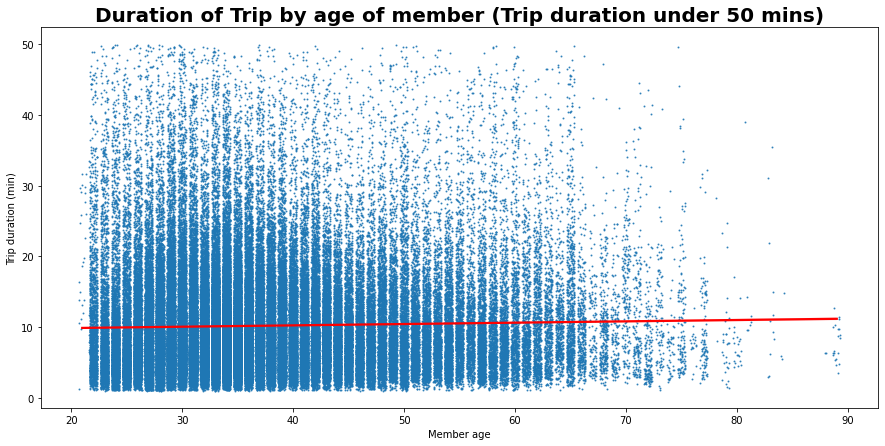

In [152]:
#Because the visualization only focus on the duration min lower than 400 min
eligible_age = eligible_age.query('50 >= duration_min')

plt.figure(figsize = [15,7]) 
sns.regplot(data = eligible_age, 
            x = 'member_age', 
            y = 'duration_min',
            x_jitter = 0.35,
            scatter_kws = {'s': 1},
            line_kws = {'color' : "r"}
           )

plt.xlabel('Member age', size = 10)
plt.ylabel('Trip duration (min)', size = 10)
plt.title('Duration of Trip by age of member (Trip duration under 50 mins)', size = 20, weight = 'bold')

plt.show();


**Observation**

- According to the heatmap above, most of the trips are under 50 minutes and group with age around 30 have made the most travel by bike with more than 83K trips in February 2019.

- In order to have a clearer picture, a same plot is prepared but with the duration of a trip is limited to 50 minutes at cap. And based on the second plot, we could identify the relationship between the member age and trip duration is quite weak due to the kde line increases slightly over the member age.

- At each range of member's age:
    + **From 20 to under 30** the older the people are, the longer they ride bike. At around 20 years old, the majority of people only take the longest ride at 10 to 13 minutes while this duration expands up to 20 minutes for the those people who are around 30. At this stage, there is a clear trend could be observed while more people ride bike and they ride bike longer. 
    + **From 30 to under 40** for the trips under 50 minutes long, there are 83K trips conducted and we can see the trend of riding bike longer reach the peak at 22-24 minutes max and the age of member is around from 32 to 35, which means more people within this age ride longer than any age segment.
    + **From 40 to 90** the trend of most people riding longer at this stage slightly drop over member age and only a few trips conducted at the age of around 80 and 90.


Text(0.5, 1.0, 'Duration of trip by user type')

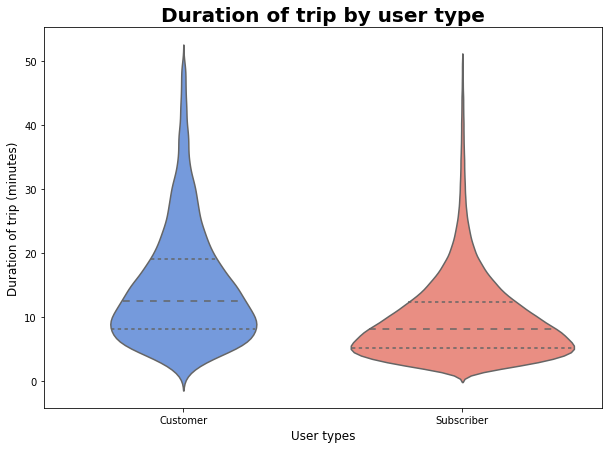

In [41]:
plt.figure(figsize = [10,7])

#As shown above, it is meaningful to have the value of duration_min lower than 50 minutes
eligible_time = master_df.query('duration_min <= 50')

colors = {'Customer': 'cornflowerblue', 'Subscriber':'salmon'}

sns.violinplot(data = eligible_time, 
               x = 'user_type', 
               y = 'duration_min',
               inner = 'quartile', 
               palette = colors)

plt.xlabel('User types', size = 12)
plt.ylabel('Duration of trip (minutes)', size = 12)
plt.title('Duration of trip by user type', size = 20, weight = 'bold')



**Observation**

- The median of trip duration under Customer user is higher than Subscriber user
- The widest curve point of Customer user is also higher than the Subscriber user

Therefore, it could be concluded that the Customer user tends to have a longer trip while Subscriber user prefer shorter one.

### The relationships observed in this part of the investigation.

- Considering the number of trip conducted by time of day, both user types have a very same pattern, where they reach the peak at 8AM and 5PM, remain stable from 10AM to 3PM and go down from 7PM to the lowest point at 3AM.
- Considering the number of trip conducted by day, Subscriber users use bike mostly within weekdays and less demand on weekend, while there is no significant different between days under Customer user type.
- The Customer user tends to have a longer trip while Subscriber user prefer shorter one.
- Both Customer user type and Subscriber user type have the same user segment where the people within the age from 25 to around 40 have the highest demand in bike.

### Other interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between member's age and trip duration is quite weak, but we have observed a trend of number of user riding bike by age and by duration of trip.

Accordingly, more people riding bike longer from 20 to 30 and reach the peak of trend at around 32 to 35 years old, where there are 83K trips and the range of trip duration prolong up to 22-24 minutes, before slightly decrease to a few trips conducted at 80 - 90 years old.

## Multivariate Exploration

In [158]:
#create a function to create heatmap plot for user type
def makeHeatplot(user):
    trip_user = master_df[master_df['user_type'] == user]
    user_df = trip_user[['day_of_week','time_of_day']].value_counts().reset_index(name = 'count')

    user_pivot = user_df.pivot(index = 'day_of_week', columns = 'time_of_day', values = 'count').reindex(weekday_invert)

    sns.heatmap(user_pivot,
                cmap = 'Oranges',
                robust = False,
                vmin = 0, vmax = 4300,
                annot = True, fmt=".0f")

    plt.xlabel('Time of day (hour)', size = 13)
    plt.ylabel('Day of week', size = 13)
    plt.title(f'''Count of trip under day of week and time of day (hour): {user}''', size = 20, weight = 'bold')
    plt.yticks(rotation = 0)

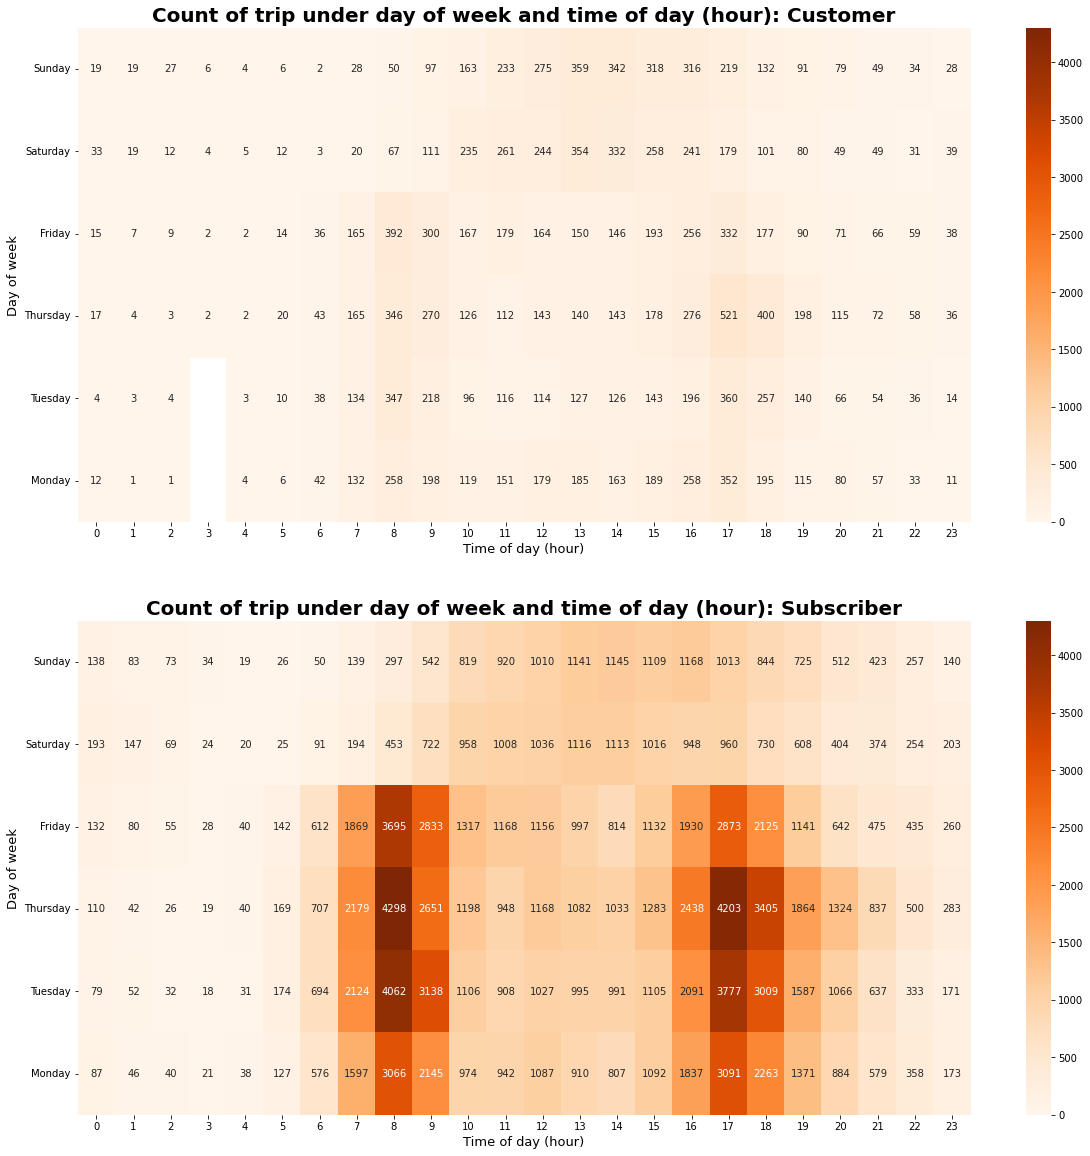

In [160]:
plt.figure(figsize = [20,20])

weekday_invert = ['Sunday','Saturday','Friday','Thursday','Tuesday','Monday']

#Customer
plt.subplot(2,1,1)
makeHeatplot('Customer')

#Subscriber
plt.subplot(2,1,2)
makeHeatplot('Subscriber')

**Observation**

In overall, the number of trips taken of subscriber is far higher than customer as the cooler color of customer.

- For Customer users, they use bike more on 8AM and 5PM on weekdays and 10AM to 5PM on weekend. The different in the peak time between weekend and weekdays is not very significant.
- For Subscriber users, it is similar to the Customer user type, however, on weekend, the peak time of using bike is from 10AM to 7PM. 

In [43]:
#In order to generate a plot containing information of both average duration of trip and number of trip taken
#It is neccessary to create a function to prepare a dataframe storing two information by member age

def df_for_plotting(eligible_age, user_type):
    #create a dummy dataset containing full age range
    age_dummy = pd.DataFrame([i for i in range (eligible_age.member_age.min(),eligible_age.member_age.max())], 
                             columns = ['member_age'])

    eligible_age = eligible_age.query('user_type == "{}"'.format(user_type))
    
    #Prepare the data for average duration
    average_duration = eligible_age.groupby('member_age').duration_min.mean().reset_index(name = 'avg_duration')

    #Prepare the data for number of trip
    count_age = eligible_age['member_age'].value_counts().reset_index(name = 'count')
    trip_count = count_age.sort_values('index')

    #create customer_age with full age range
    df = age_dummy.merge(average_duration, on = 'member_age', how = 'left')
    df = df.merge(trip_count, 
                  left_on = 'member_age',
                  right_on = 'index',
                  how ='left').drop('index', axis = 1)
    
    df.fillna(0, inplace = True)
    df[['avg_duration','count']] = df[['avg_duration','count']].astype('int')
    
    return df

In [137]:
#create a function to make a combo plot for user type
def makeComboplot(user, ax, barColor, lineColor):
    customer_age = df_for_plotting(eligible_age, user)

    sns.barplot(ax = ax, data = customer_age, x = 'member_age', y = 'avg_duration', color = barColor)
    ax1 = ax.twinx()
    sns.lineplot(ax = ax1, data = customer_age, x = ax1.get_xticks() ,y = 'count', color = lineColor)

    ax.set_xlabel('Member age', size = 25)
    ax.set_ylabel('Average trip duration (min)', size = 25)
    ax1.set_ylabel('Frequency', size = 25)
    ax.set_title(f'''Average trip duration by member age: {user}''', size = 40, weight = 'bold')
    ax.tick_params(axis = 'y',labelsize = 25)
    ax.tick_params(axis = 'x', labelsize =16)
    ax1.tick_params(axis = 'y', labelsize = 25);

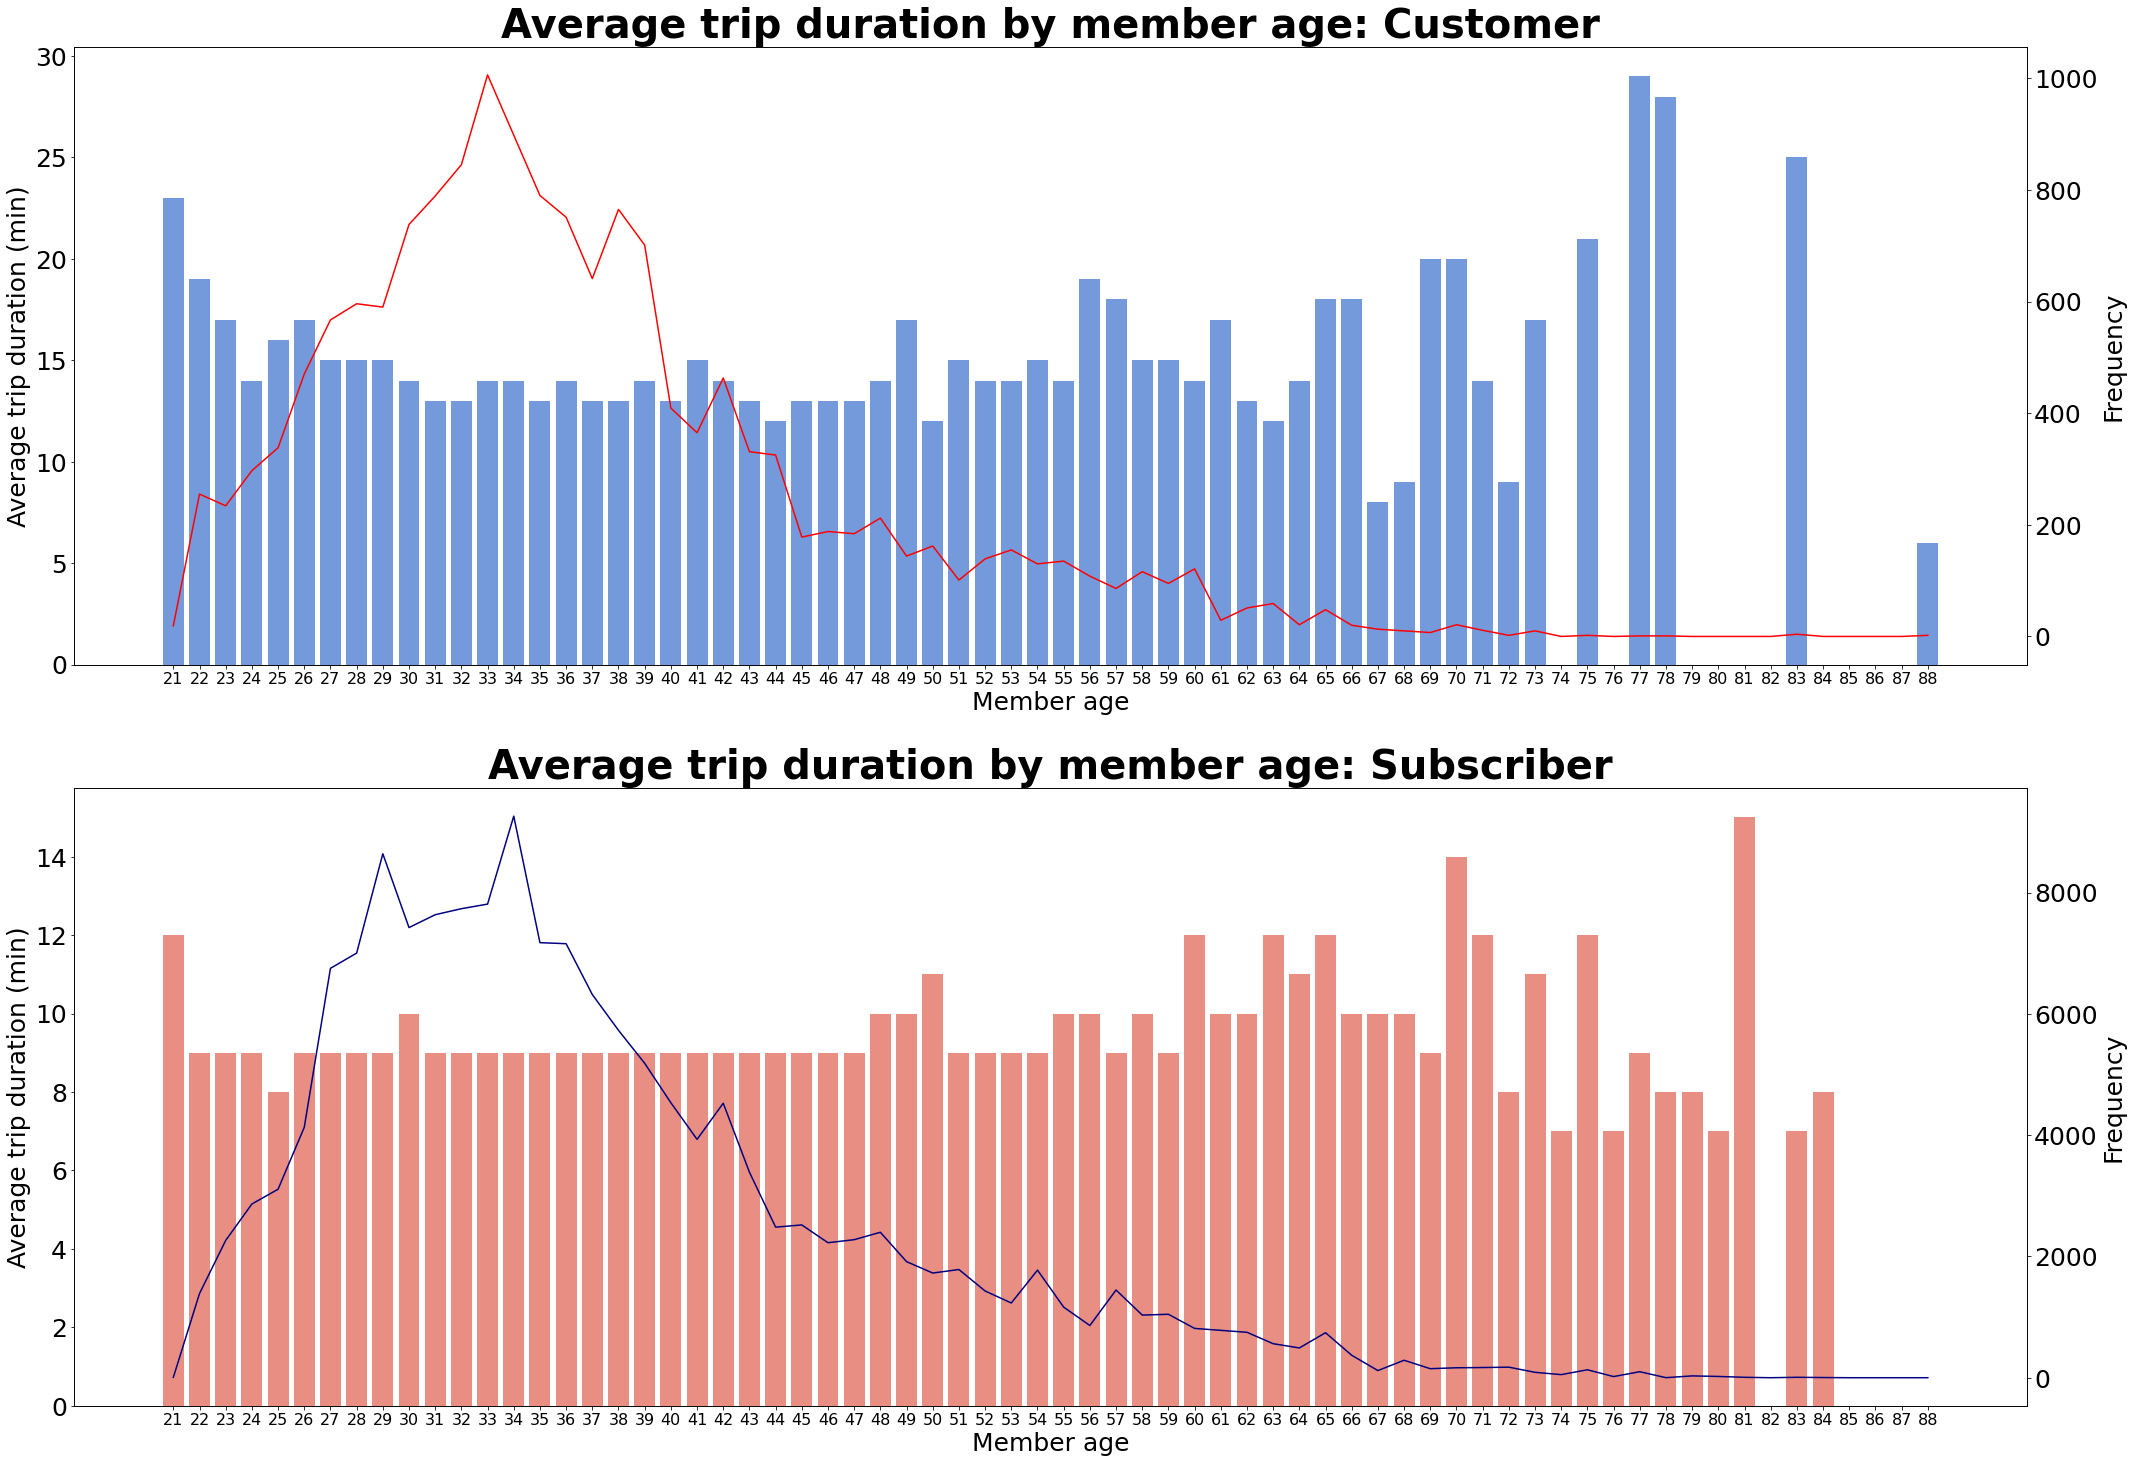

In [136]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = [35,25])

#Customer
makeComboplot('Customer', ax1, 'cornflowerblue', 'r')


#Subscriber
makeComboplot('Subscriber', ax2, 'salmon', 'Navy')

plt.show()

**Observation**

- The maximum value of average trip duration for Customer user and Subscriber user shows that he Customer users take longer trip than Subscriber user
- For the Customer user, there is a burst in the demand for the users within the age of 21 to 34, however, the average trip duration goes in a contrast trend from nearly 24 min down to 15 min. After the point of 34, the number of trip decrease sharply to 0 but the average duration trip spikes up to nearly 30 minutes.
- For the Subscriber user, as the same as the Customer user, the number of trips burst along with the age of member from 21 to 34, but unlike the Customer, the average duration remains stable at 9 mins to the point of 59 years old. From the point of 34 onward, the number of trip decrease as well, but the average duration of a trip goes up.

### The relationships you observed in this part of the investigation.

- In overall, the number of trips taken of subscriber is far higher than customer as the cooler color of customer.
- For the number of trips conducted, Customer and Subscriber user types have a same peak time during a day (e.g. 8AM and 5PM). But the peak time on the weekend of Subscriber user lasts longer.
- The maximum value of average trip duration for Customer user and Subscriber user shows that he Customer users take longer trip than Subscriber user
- Two user types share a quite similar scene in the relationship between average trip duration and number of trips conducted by member's age.

### Some interesting interactions between features


- The peak time on the weekend of Subscriber user lasts longer.
- The average trip duration of Subscriber users seems more stable than Customer users

## Conclusions

- 9 over 10 most common start station are also the most common end stations. In which, Market St at 10th St and San Francisco Caltrain Station 2 are the two stations recorded as most two common start and end stations.
- The trip lengths vary in a very wide range from 1 minute to over 14,000 minutes (24 hours equivalent).
- It is skewed to the right with most of the trips take 3 to 50 minutes and 5 minutes is the most common duration of a trip.
- 74.6% of members are male, female and other genders accounts for 23.3% and 2.1% respectively
- Nearly 90% of members are Subscriber
- Within a day, there are two periods of time where the demand of bike reach the peak, one is on 8AM and the other is on 5PM.
- The number of trips conducted on weekdays are significantly higher, especially on Thurday, comparing to the weekend days (i.e. Saturday and Sunday)
- Considering the number of trip conducted by time of day, both user types have a very same pattern, where they reach the peak at 8AM and 5PM, remain stable from 10AM to 3PM and go down from 7PM to the lowest point at 3AM.
- Considering the number of trip conducted by day, Subscriber users use bike mostly within weekdays and less demand on weekend, while there is no significant different between days under Customer user type.
- The Customer user tends to have a longer trip while Subscriber user prefer shorter one.
- Both Customer user type and Subscriber user type have the same user segment where the people within the age from 25 to around 40 have the highest demand in bike.
- In overall, the number of trips taken of subscriber is far higher than customer as the cooler color of customer.
- For the number of trips conducted, Customer and Subscriber user types have a same peak time during a day (e.g. 8AM and 5PM). But the peak time on the weekend of Subscriber user lasts longer.
- The maximum value of average trip duration for Customer user and Subscriber user shows that he Customer users take longer trip than Subscriber user
- Two user types share a quite similar scene in the relationship between average trip duration and number of trips conducted by member's age.
